# UTKFace

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import random

import torch
import torch.nn as nn

import mydata
from mymodels import TransDataset, LoadDataset, EfficientB7Model, ResNet50Model, VGG16Model
from training import ModelTrainer

In [2]:
# to reproduce
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

In [3]:
db = "UTKFace"
root = f"../../dataset/AAAI 2025/{db}/"
df_train = mydata.load_and_process_csv(f"{root}/dataframe/df_train.csv")
df_valid = mydata.load_and_process_csv(f"{root}/dataframe/df_valid.csv")
df_test = mydata.load_and_process_csv(f"{root}/dataframe/df_test.csv")

ycol="labels"
batch_size = 8

ld = LoadDataset(df_train, df_valid, df_test, ycol, batch_size)
train_loader, valid_loader, test_loader = ld.create_dataloaders()

H*W:  (200, 200)


# Efficientnet

In [4]:
model_name = "efficientnet"
model_save_directory = f"{root}/model/{model_name}/"
df_valid_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_valid_{model_name}.csv"
df_test_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_test_{model_name}.csv"

Validation Accuracy: 0.8154 | Loss: 0.4666 | F1: 0.8120
Validation Accuracy: 0.8578 | Loss: 0.3419 | F1: 0.8527
Validation Accuracy: 0.8754 | Loss: 0.2957 | F1: 0.8742
Validation Accuracy: 0.8855 | Loss: 0.2723 | F1: 0.8819
Validation Accuracy: 0.8930 | Loss: 0.2612 | F1: 0.8899
Validation Accuracy: 0.8951 | Loss: 0.2372 | F1: 0.8908
Validation Accuracy: 0.9065 | Loss: 0.2254 | F1: 0.9053
Validation Accuracy: 0.8981 | Loss: 0.2299 | F1: 0.8926
Validation Accuracy: 0.9115 | Loss: 0.2046 | F1: 0.9088
Validation Accuracy: 0.9144 | Loss: 0.1979 | F1: 0.9139
Validation Accuracy: 0.9148 | Loss: 0.1940 | F1: 0.9157
Validation Accuracy: 0.9157 | Loss: 0.1859 | F1: 0.9152
Validation Accuracy: 0.9140 | Loss: 0.1897 | F1: 0.9143
Validation Accuracy: 0.9216 | Loss: 0.1940 | F1: 0.9189
Validation Accuracy: 0.9237 | Loss: 0.1773 | F1: 0.9235
Validation Accuracy: 0.9195 | Loss: 0.1873 | F1: 0.9180
Validation Accuracy: 0.9199 | Loss: 0.1912 | F1: 0.9178
Validation Accuracy: 0.9258 | Loss: 0.1868 | F1:

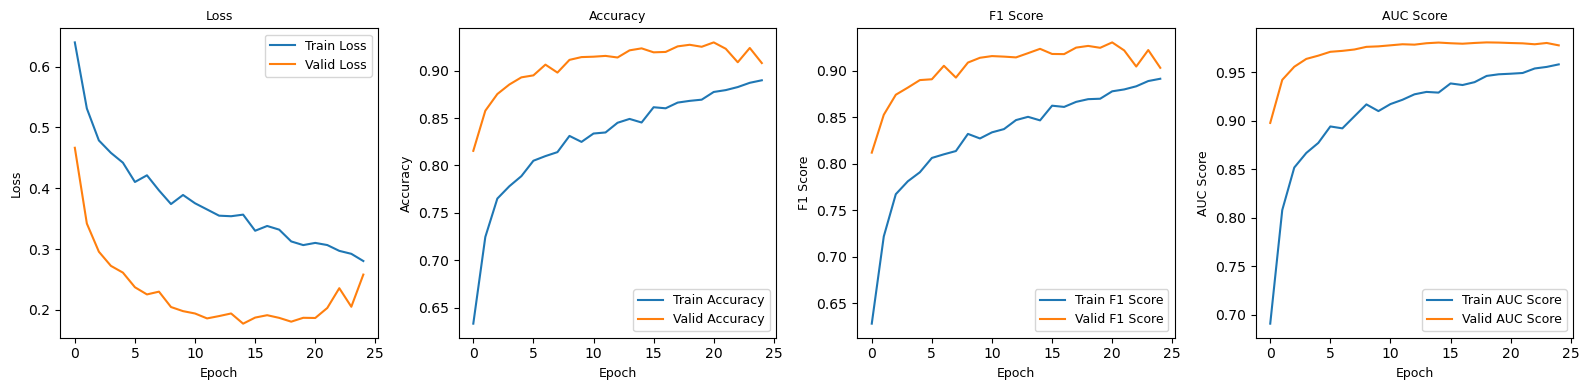

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = EfficientB7Model().to(device) # model -> GPU

# Train the model
num_epochs = 25
lr = 0.00001

trainer = ModelTrainer(model_save_directory)
best_val_file = trainer.train(model, train_loader, valid_loader, num_epochs=num_epochs, lr=lr)

In [6]:
def evaluations(trainer, model, valid_loader, df, df_filepath):
    test_predictions, test_outputs = trainer.evaluate(model, valid_loader)
    tmp = df.copy()
    tmp["predictions"] = test_predictions
    tmp["proba"] = test_outputs
    tmp.to_csv(df_filepath, index=False)
    trainer.report(tmp)

In [7]:
model = EfficientB7Model().to(device) # model -> GPU
model.load_state_dict(torch.load(best_val_file))
evaluations(trainer, model, valid_loader, df_valid, df_valid_filepath)

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1181
           1       0.93      0.91      0.92      1203

    accuracy                           0.92      2384
   macro avg       0.92      0.92      0.92      2384
weighted avg       0.92      0.92      0.92      2384

Skin tone 1: Accuracy 0.9309153713298791
Skin tone 3: Accuracy 0.9489795918367347
Skin tone 0: Accuracy 0.9322314049586777
Skin tone 2: Accuracy 0.8839869281045751


In [8]:
evaluations(trainer, model, test_loader, df_test, df_test_filepath)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1171
           1       0.92      0.90      0.91      1177

    accuracy                           0.91      2348
   macro avg       0.91      0.91      0.91      2348
weighted avg       0.91      0.91      0.91      2348

Skin tone 1: Accuracy 0.9301075268817204
Skin tone 3: Accuracy 0.9408695652173913
Skin tone 2: Accuracy 0.8663366336633663
Skin tone 0: Accuracy 0.9113300492610837


# Resnet

In [9]:
model_name = "resnet"
model_save_directory = f"{root}/model/{model_name}/"
df_valid_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_valid_{model_name}.csv"
df_test_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_test_{model_name}.csv"

/home/kuniko/anaconda3/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


Validation Accuracy: 0.6988 | Loss: 0.6290 | F1: 0.7238
Validation Accuracy: 0.7836 | Loss: 0.4991 | F1: 0.7780
Validation Accuracy: 0.8310 | Loss: 0.4081 | F1: 0.8239
Validation Accuracy: 0.8410 | Loss: 0.3563 | F1: 0.8488
Validation Accuracy: 0.8616 | Loss: 0.3367 | F1: 0.8565
Validation Accuracy: 0.8544 | Loss: 0.3235 | F1: 0.8610
Validation Accuracy: 0.8788 | Loss: 0.2890 | F1: 0.8797
Validation Accuracy: 0.8683 | Loss: 0.2918 | F1: 0.8626
Validation Accuracy: 0.8779 | Loss: 0.2753 | F1: 0.8754
Validation Accuracy: 0.8863 | Loss: 0.2624 | F1: 0.8842
Validation Accuracy: 0.8830 | Loss: 0.2675 | F1: 0.8861
Validation Accuracy: 0.8867 | Loss: 0.2594 | F1: 0.8839
Validation Accuracy: 0.8930 | Loss: 0.2512 | F1: 0.8961
Validation Accuracy: 0.8930 | Loss: 0.2478 | F1: 0.8934
Validation Accuracy: 0.8985 | Loss: 0.2478 | F1: 0.8982
Validation Accuracy: 0.8901 | Loss: 0.2515 | F1: 0.8860
Validation Accuracy: 0.8972 | Loss: 0.2384 | F1: 0.8979
Validation Accuracy: 0.9035 | Loss: 0.2282 | F1:

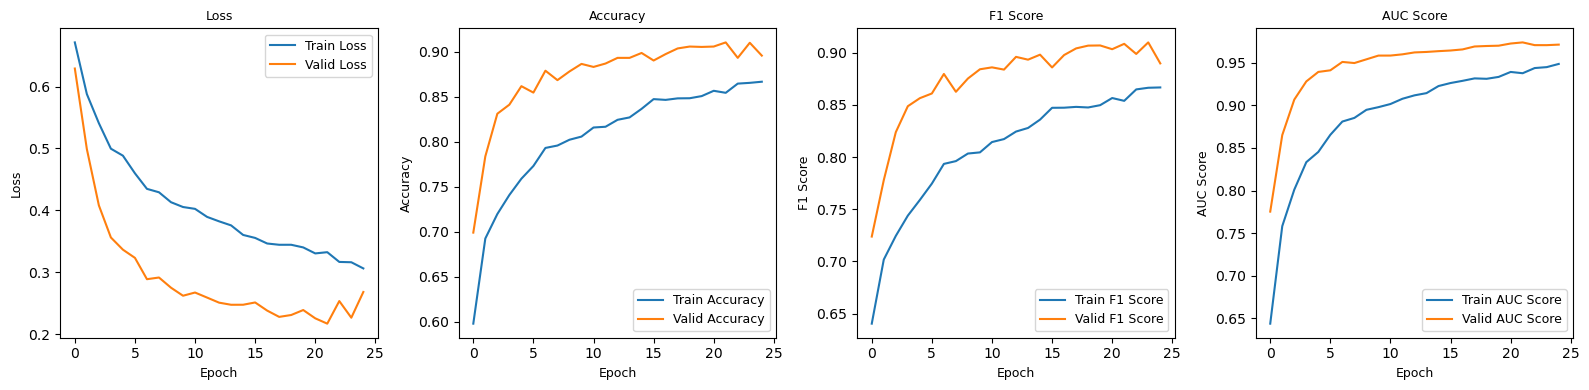

In [10]:
model = ResNet50Model().to(device) # model -> GPU

num_epochs = 25
lr = 0.00001

trainer = ModelTrainer(model_save_directory)
best_val_file = trainer.train(model, train_loader, valid_loader, num_epochs=num_epochs, lr=lr)

In [11]:
model = ResNet50Model().to(device) # model -> GPU
model.load_state_dict(torch.load(best_val_file))
evaluations(trainer, model, valid_loader, df_valid, df_valid_filepath)

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1181
           1       0.93      0.88      0.91      1203

    accuracy                           0.91      2384
   macro avg       0.91      0.91      0.91      2384
weighted avg       0.91      0.91      0.91      2384

Skin tone 1: Accuracy 0.9309153713298791
Skin tone 3: Accuracy 0.9285714285714286
Skin tone 0: Accuracy 0.915702479338843
Skin tone 2: Accuracy 0.8676470588235294


In [12]:
evaluations(trainer, model, test_loader, df_test, df_test_filepath)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1171
           1       0.93      0.87      0.90      1177

    accuracy                           0.90      2348
   macro avg       0.91      0.90      0.90      2348
weighted avg       0.91      0.90      0.90      2348

Skin tone 1: Accuracy 0.9265232974910395
Skin tone 3: Accuracy 0.9234782608695652
Skin tone 2: Accuracy 0.8613861386138614
Skin tone 0: Accuracy 0.909688013136289


# VGG

In [13]:
model_name = "vgg"
model_save_directory = f"{root}/model/{model_name}/"
df_valid_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_valid_{model_name}.csv"
df_test_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_test_{model_name}.csv"

/home/kuniko/anaconda3/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


Validation Accuracy: 0.5961 | Loss: 0.6425 | F1: 0.7040
Validation Accuracy: 0.6770 | Loss: 0.5898 | F1: 0.7381
Validation Accuracy: 0.7525 | Loss: 0.5139 | F1: 0.7757
Validation Accuracy: 0.7794 | Loss: 0.4633 | F1: 0.7877
Validation Accuracy: 0.7798 | Loss: 0.4492 | F1: 0.7967
Validation Accuracy: 0.8087 | Loss: 0.4127 | F1: 0.8137
Validation Accuracy: 0.8167 | Loss: 0.3926 | F1: 0.8162
Validation Accuracy: 0.8314 | Loss: 0.3753 | F1: 0.8321
Validation Accuracy: 0.8347 | Loss: 0.3634 | F1: 0.8250
Validation Accuracy: 0.8431 | Loss: 0.3443 | F1: 0.8410
Validation Accuracy: 0.8456 | Loss: 0.3361 | F1: 0.8407
Validation Accuracy: 0.8511 | Loss: 0.3236 | F1: 0.8543
Validation Accuracy: 0.8490 | Loss: 0.3316 | F1: 0.8397
Validation Accuracy: 0.8553 | Loss: 0.3168 | F1: 0.8614
Validation Accuracy: 0.8612 | Loss: 0.3033 | F1: 0.8605
Validation Accuracy: 0.8624 | Loss: 0.2956 | F1: 0.8656
Validation Accuracy: 0.8725 | Loss: 0.2888 | F1: 0.8698
Validation Accuracy: 0.8725 | Loss: 0.2860 | F1:

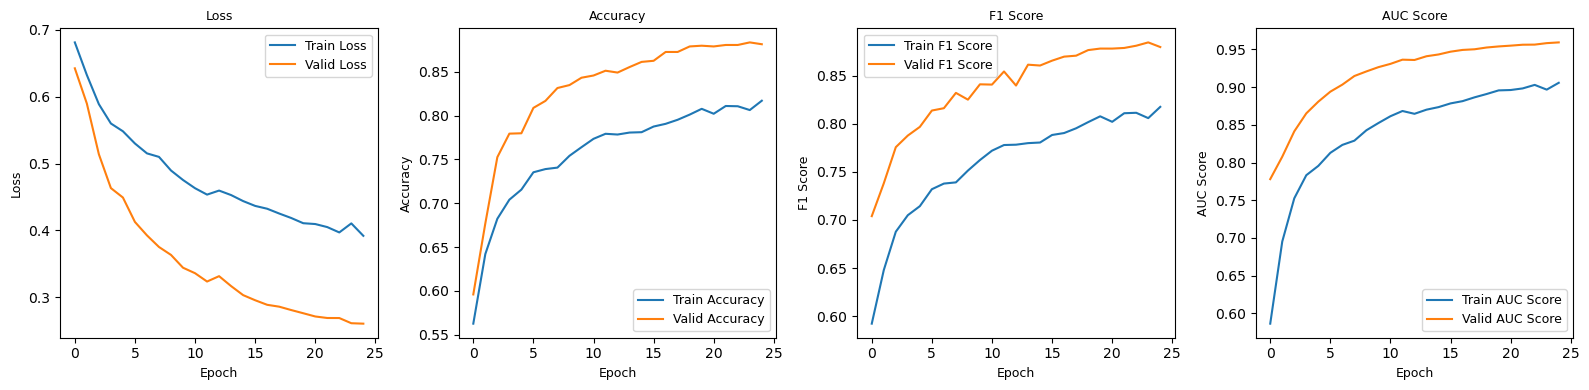

In [14]:
model = VGG16Model().to(device) # model -> GPU

num_epochs = 25
lr = 0.000001

trainer = ModelTrainer(model_save_directory)
best_val_file = trainer.train(model, train_loader, valid_loader, num_epochs=num_epochs, lr=lr)

In [15]:
model = VGG16Model().to(device) # model -> GPU
model.load_state_dict(torch.load(best_val_file))
evaluations(trainer, model, valid_loader, df_valid, df_valid_filepath)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1181
           1       0.90      0.86      0.88      1203

    accuracy                           0.88      2384
   macro avg       0.88      0.88      0.88      2384
weighted avg       0.88      0.88      0.88      2384

Skin tone 1: Accuracy 0.8842832469775475
Skin tone 3: Accuracy 0.9183673469387755
Skin tone 0: Accuracy 0.8859504132231405
Skin tone 2: Accuracy 0.8382352941176471


In [16]:
evaluations(trainer, model, test_loader, df_test, df_test_filepath)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1171
           1       0.89      0.87      0.88      1177

    accuracy                           0.88      2348
   macro avg       0.88      0.88      0.88      2348
weighted avg       0.88      0.88      0.88      2348

Skin tone 1: Accuracy 0.8888888888888888
Skin tone 3: Accuracy 0.9113043478260869
Skin tone 2: Accuracy 0.8283828382838284
Skin tone 0: Accuracy 0.8981937602627258


/home/kuniko/anaconda3/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
